# Healthy Life Expectancy Capstone Project

Import Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cmaps = 'oranges'
#plt.style.use('dark_background')
%matplotlib inline

Read data

In [2]:
# All the tables edited and organzied by excel sheet also.
# data's Year = {1990, 2000,2012,2013}

In [3]:
#Table #1

In [4]:
healthy_life = pd.read_csv('../data/health_life_expectancy.csv')
healthy_life.head()

,GhoCode,GhoDisplay,YearDisplay,RegionDisplay,WorldBankIncomeGroupDisplay,CountryDisplay,SexDisplay,DisplayValue
0,WHOSIS_000015,Life expectancy at age 60 (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,16
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50
3,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,17
4,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Male,15


In [5]:
healthy_life.shape

(6408, 8)

Rename columns

In [6]:
healthy_life = healthy_life.rename(columns = {'GhoCode':'GhoCode','GhoDisplay':'Gho',
                                              'YearDisplay':'Year','RegionDisplay':'Region',
                                             'WorldBankIncomeGroupDisplay':'IncomeGroup',
                                             'CountryDisplay':'Country','SexDisplay':'Sex',
                                             'DisplayValue':'Value'})
healthy_life.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value
0,WHOSIS_000015,Life expectancy at age 60 (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,16
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50
3,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,17
4,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Male,15


In [7]:
# lookinge life expectancy and healthy expectancy at birth(years)

In [8]:
healthy_life = healthy_life.loc[~(healthy_life['Gho'] == 'Life expectancy at age 60 (years)')]
healthy_life
                 

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50
5,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,49
6,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61
7,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,45
...,...,...,...,...,...,...,...,...
6403,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Zimbabwe,Male,37
6404,WHOSIS_000001,Life expectancy at birth (years),2012,Africa,Low_income,Zimbabwe,Both sexes,58
6405,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Africa,Low_income,Zimbabwe,Female,52
6406,WHOSIS_000001,Life expectancy at birth (years),1990,Africa,Low_income,Zimbabwe,Male,60


Create a new columns called Value_life stands for life expectancy and Value_health stands for healthy_life expectance(HALE) 
to separte the values of life expectancy and health expectancy from Gho column.

In [9]:
healthy_life['Gho']

1                      Life expectancy at birth (years)
2       Healthy life expectancy (HALE) at birth (years)
5       Healthy life expectancy (HALE) at birth (years)
6                      Life expectancy at birth (years)
7       Healthy life expectancy (HALE) at birth (years)
                             ...                       
6403    Healthy life expectancy (HALE) at birth (years)
6404                   Life expectancy at birth (years)
6405    Healthy life expectancy (HALE) at birth (years)
6406                   Life expectancy at birth (years)
6407                   Life expectancy at birth (years)
Name: Gho, Length: 4080, dtype: object

In [10]:
healthy_life['Life expectancy'] = np.where(healthy_life['Gho']=='Life expectancy at birth (years)',
                                                            healthy_life['Value'] , np.nan)

healthy_life['Healthy_Life expectancy'] = np.where(healthy_life['Gho']=='Healthy life expectancy (HALE) at birth (years)',
                                                                    healthy_life['Value'] , np.nan)

In [11]:
healthy_life.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50,NaN,50.0
5,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,49,NaN,49.0
6,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61,61.0,NaN
7,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,45,NaN,45.0


In [12]:
#Table #2 

In [13]:
expenditure = pd.read_csv('../data/healthy-life-health-expenditure-per-capita.csv')
expenditure.head()

,Entity,Year,"Current health expenditure per capita, PPP (current international $)",Population (historical estimates)
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1990,NaN,10694804.0
2,Afghanistan,1991,NaN,10745168.0
3,Afghanistan,1992,NaN,12057436.0
4,Afghanistan,1993,NaN,14003764.0


In [14]:
# Rename columns
expenditure = expenditure.rename(columns = {'Entity':'Entity','Year':'Year','Current health expenditure per capita, PPP (current international $)':
                                           'PPP','Population (historical estimates)':'Population'})
expenditure.head()         

,Entity,Year,PPP,Population
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1990,NaN,10694804.0
2,Afghanistan,1991,NaN,10745168.0
3,Afghanistan,1992,NaN,12057436.0
4,Afghanistan,1993,NaN,14003764.0


In [15]:
# select years 1990,2000,2012,2013
expenditure = expenditure.loc[(expenditure['Year'] ==1990)|(expenditure['Year'] ==2000)|
                              (expenditure['Year'] ==2012)|(expenditure['Year']==2013)]
expenditure.head()

,Entity,Year,PPP,Population
1,Afghanistan,1990,NaN,10694804.0
11,Afghanistan,2000,NaN,19542986.0
23,Afghanistan,2012,151.91798,30466484.0
24,Afghanistan,2013,174.05948,31541216.0
487,Africa,1990,NaN,638157571.0


In [16]:
# Table #3 

In [17]:
# data took on Adults only.
bmi = pd.read_csv('../data/bmi_age_standardised_country.csv')
bmi.head()

,Country/Region/World,Sex,Year,Mean BMI
0,Afghanistan,Men,1975,18.999440
1,Afghanistan,Men,1976,19.105518
2,Afghanistan,Men,1977,19.212080
3,Afghanistan,Men,1978,19.319053
4,Afghanistan,Men,1979,19.425952


In [18]:
# rename columns
bmi = bmi.rename(columns = {'Country/Region/World':'Country','Sex':'Sex','Year':'Year','Mean BMI':'BMI'})
bmi.head()

,Country,Sex,Year,BMI
0,Afghanistan,Men,1975,18.999440
1,Afghanistan,Men,1976,19.105518
2,Afghanistan,Men,1977,19.212080
3,Afghanistan,Men,1978,19.319053
4,Afghanistan,Men,1979,19.425952


In [19]:
bmi = bmi.loc[(bmi['Year'] ==1990)|(bmi['Year'] ==2000)|
             (bmi['Year'] ==2012)|(bmi['Year']==2013)]
bmi.head()

,Country,Sex,Year,BMI
15,Afghanistan,Men,1990,20.502805
25,Afghanistan,Men,2000,21.369506
37,Afghanistan,Men,2012,22.343871
38,Afghanistan,Men,2013,22.427785
57,Albania,Men,1990,24.818641


In [20]:
bmi['Sex']= bmi.Sex.replace({'Men':'Male','Women':'Female'})
bmi.head()

,Country,Sex,Year,BMI
15,Afghanistan,Male,1990,20.502805
25,Afghanistan,Male,2000,21.369506
37,Afghanistan,Male,2012,22.343871
38,Afghanistan,Male,2013,22.427785
57,Albania,Male,1990,24.818641


Combine table#1 and table #2

In [21]:
#df = pd.merge(df1,df2)

In [22]:
expectancy_expenditure = pd.merge(healthy_life,expenditure)
expectancy_expenditure.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Afghanistan,174.05948,3.154122e+07
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Africa,NaN,1.140181e+09
2,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Africa (UN),NaN,1.140181e+09
3,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Albania,567.60480,2.887019e+06
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Algeria,788.07680,3.800063e+07


In [23]:
# Combine expectancy_expenditure and BMI (table #3)

In [24]:
combine = pd.merge(expectancy_expenditure, bmi)
combine.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Afghanistan,174.05948,3.154122e+07,22.427785
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Africa,NaN,1.140181e+09,22.427785
2,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Africa (UN),NaN,1.140181e+09,22.427785
3,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Albania,567.60480,2.887019e+06,22.427785
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Algeria,788.07680,3.800063e+07,22.427785


# Data cleaning

In [25]:
combine.shape

(729240, 14)

In [26]:
#Identify missing/null values

combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729240 entries, 0 to 729239
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   GhoCode                  729240 non-null  object 
 1   Gho                      729240 non-null  object 
 2   Year                     729240 non-null  int64  
 3   Region                   729240 non-null  object 
 4   IncomeGroup              625518 non-null  object 
 5   Country                  729240 non-null  object 
 6   Sex                      729240 non-null  object 
 7   Value                    729240 non-null  int64  
 8   Life expectancy          417012 non-null  float64
 9   Healthy_Life expectancy  312228 non-null  float64
 10  Entity                   729240 non-null  object 
 11  PPP                      425508 non-null  float64
 12  Population               637908 non-null  float64
 13  BMI                      729240 non-null  float64
dtypes: f

In [27]:
# keep all the null values.

Checking duplicates

In [28]:
duplicate_all = combine.duplicated().any()
duplicate_all

False

In [29]:
# I dont have any duplicate values

checking the data types

In [30]:
combine.dtypes

GhoCode                     object
Gho                         object
Year                         int64
Region                      object
IncomeGroup                 object
Country                     object
Sex                         object
Value                        int64
Life expectancy            float64
Healthy_Life expectancy    float64
Entity                      object
PPP                        float64
Population                 float64
BMI                        float64
dtype: object

In [31]:
# All columns have in the right format.

Checking if there is any Outliers

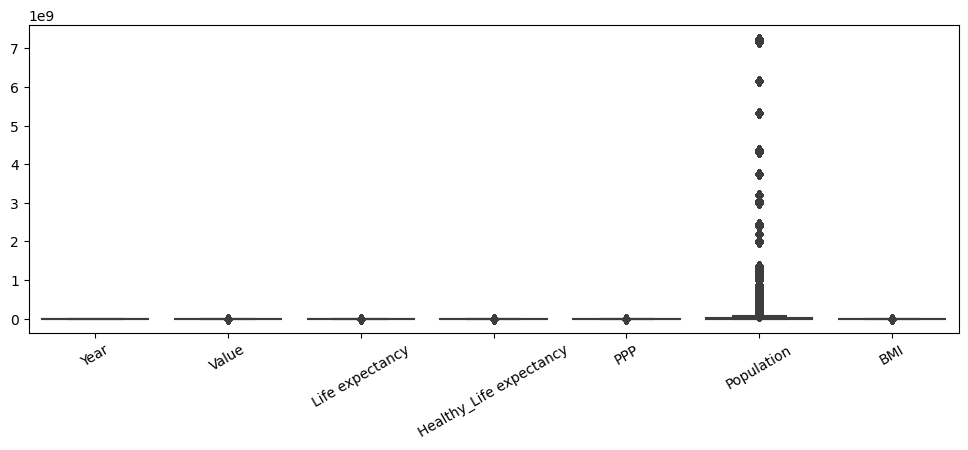

In [32]:
# Box plot can tell me whether I have an outlier or not

plt.figure(figsize = (12,4))
sns.boxplot(combine)
plt.xticks(rotation=30);

In [33]:
#????? how I treat the null values and the outliers

    So population have alot of high_outlier, I drop it.

In [34]:
combine_desc = combine.describe().round(3)
combine_desc

,Year,Value,Life expectancy,Healthy_Life expectancy,PPP,Population,BMI
count,729240.000,729240.000,417012.000,312228.000,425508.000,6.379080e+05,729240.000
mean,2005.675,65.146,68.670,60.438,1067.822,1.307063e+08,25.302
std,8.438,10.317,9.985,8.759,1384.323,6.057709e+08,2.658
min,1990.000,33.000,38.000,33.000,6.932,7.690000e+02,18.530
25%,2000.000,59.000,63.000,55.000,159.162,4.066370e+05,23.381
50%,2012.000,66.000,71.000,62.000,521.961,5.409283e+06,25.506
75%,2013.000,73.000,76.000,67.000,1359.007,2.442773e+07,26.849
max,2013.000,87.000,87.000,78.000,8522.126,7.250593e+09,34.335


In [35]:
#high_outlier = (Q3 + 1.5 IQR), IQR = 75% -25%

high_outlier = combine_desc.loc['75%','Population'] + 1.5*(combine_desc.loc['75%', 'Population'] - combine_desc.loc['25%', 'Population'])
high_outlier

60459374.5

In [36]:
all_high_outlier= combine.loc[combine['Population']> high_outlier]
all_high_outlier.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Africa,NaN,1.140181e+09,22.427785
2,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Africa (UN),NaN,1.140181e+09,22.427785
13,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Asia,NaN,4.365287e+09,22.427785
14,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Asia (UN),NaN,4.366454e+09,22.427785
21,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Bangladesh,83.44547,1.540301e+08,22.427785


In [37]:
print(len(all_high_outlier))

89916


In [38]:
high_outlier

60459374.5

In [39]:
combine_df = combine[combine['Population']<= high_outlier]
combine_df.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Afghanistan,174.05948,31541216.0,22.427785
3,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Albania,567.60480,2887019.0,22.427785
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Algeria,788.07680,38000628.0,22.427785
5,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,American Samoa,NaN,53017.0,22.427785
6,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN,Andorra,2755.26500,71385.0,22.427785


In [40]:
combine_df.shape

(547992, 14)

# Exploratory Data Analysis (EDA)

I am looking
 * The distribution of healthy life expectancy and life expectancy through the world.(by country and by income group)
 * Which country has the top life expectancy and healthy life expectancy and which one is the bottom. 
 * How does the number of healthy years lose change overtime across different demographic groups?
 * How does healthy life expectancy correlate with life expectancy, health expenditure, BMI and population in different demographic groups such as age, geographical regions and income groups across the world?
 * What is the relationship between healthy life expectancy and BMI through time? Are there any patterns based on different BMI categories, and does it affect by gender?

In [41]:
expectancy_country = combine_df.groupby('Country')[['Life expectancy','Healthy_Life expectancy']].mean().sort_values(by = 'Life expectancy', ascending = False)
expectancy_country

,Life expectancy,Healthy_Life expectancy
Country,,
Japan,81.817621,74.156012
Switzerland,80.804714,71.486301
Iceland,80.692480,71.656012
Australia,80.551627,71.651446
Sweden,80.448934,70.990868
...,...,...
Mozambique,49.240741,44.133181
Central African Republic,48.710438,41.802892
Chad,48.416386,42.472603


Japan has the heighest life expectancy and healthy life expectancy.
Sierra Leone has the lowest life expectancy and healy life expectancy.

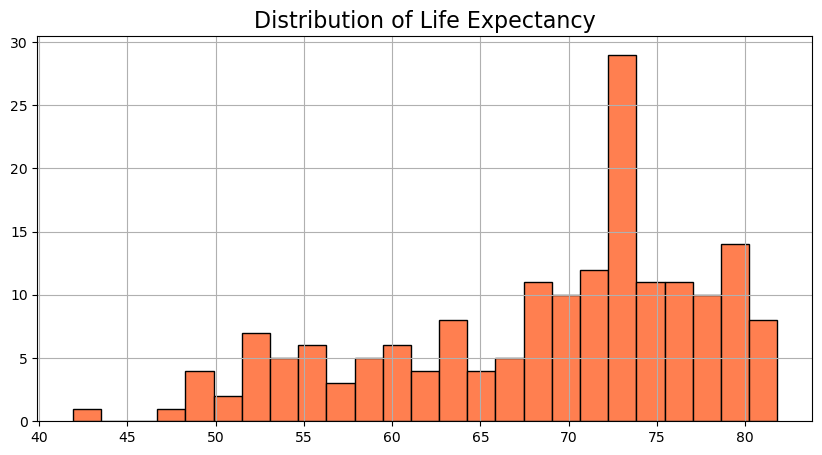

In [42]:
# Distribution of the average life expectancy through the world.
expectancy_country['Life expectancy'].hist(bins = 25,
                            color = 'coral',
                            edgecolor = 'black',
                            figsize = (10,5))

plt.title('Distribution of Life Expectancy', fontsize = 16);

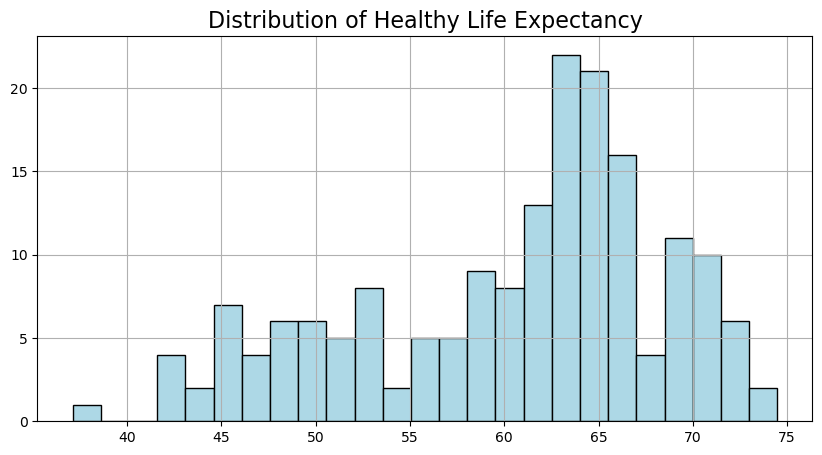

In [43]:
# Distribution of the average health life expectancy through the world.
expectancy_country['Healthy_Life expectancy'].hist(bins = 25,
                            color = 'lightblue',
                            edgecolor = 'black',
                            figsize = (10,5))

plt.title('Distribution of Healthy Life Expectancy', fontsize = 16);

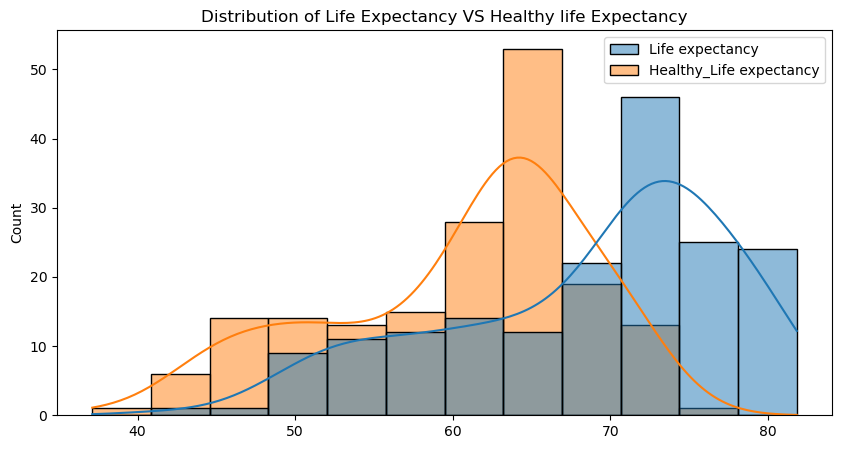

In [44]:
# Distribution of the average life expectancy and average healthy life expectancy through the world.
plt.figure(figsize = (10,5))
sns.histplot(data = expectancy_country, kde = True)
# kde stands for Kernel Density Estimation, is a method used to visualize the probability distribution of a continuous random variable.
plt.title ('Distribution of Life Expectancy VS Healthy life Expectancy');

Both distribution tables have a negatively skewed data (their mean is less than the median).

Distribution of healthy life expectancy in different income groups

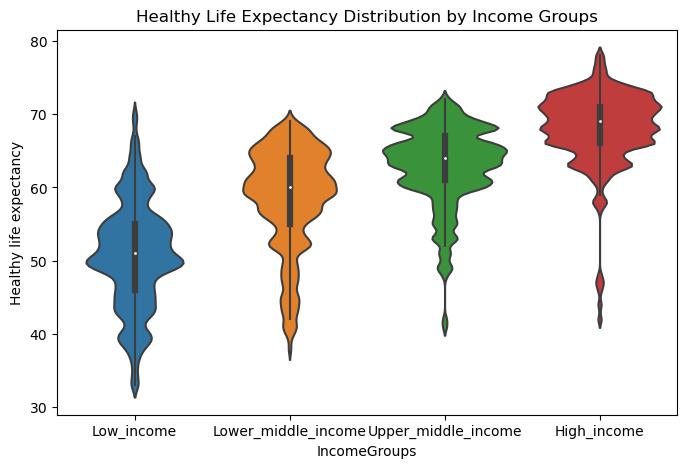

In [45]:
# Violin plot of healthy life expectancy by income groups
plt.figure(figsize = (8, 5))
sns.violinplot(data = combine_df, x = 'IncomeGroup', y = 'Healthy_Life expectancy')
plt.xlabel('IncomeGroups')
plt.ylabel('Healthy life expectancy')
plt.title('Healthy Life Expectancy Distribution by Income Groups')
plt.show()

High income groups have high healthy life expectancy. On the otherhand low income groups have low health life expectancy.

In [46]:
# looking top 10 and bottom 10 countries

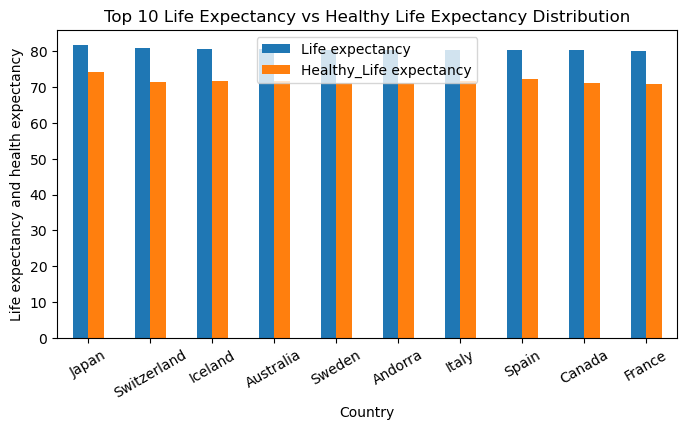

In [47]:
top10 = expectancy_country.head(10)
top10 = top10.plot(kind='bar', figsize=(8, 4))
top10.set_ylabel('Life expectancy and health expectancy')
top10.set_xlabel('Country')
plt.xticks(rotation=30)
plt.title('Top 10 Life Expectancy vs Healthy Life Expectancy Distribution')
plt.show()

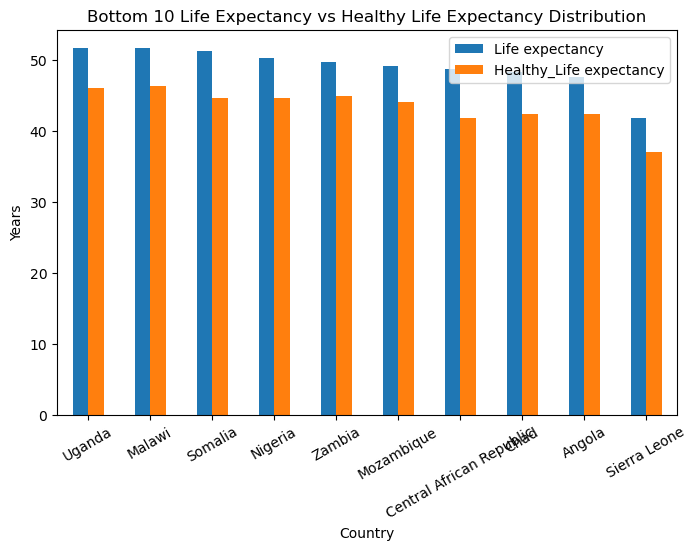

In [48]:
bottom10 = expectancy_country.tail(10)
bottom10 = bottom10.plot(kind='bar', figsize=(8, 5))
bottom10.set_ylabel('Years')
bottom10.set_xlabel('Country')
plt.xticks(rotation=30)
plt.title('Bottom 10 Life Expectancy vs Healthy Life Expectancy Distribution')
plt.show()

Looking trends of life exepctancy and healthy life expectancy through time.

In [49]:
expectancy_year = combine_df.groupby('Year')[['Life expectancy','Healthy_Life expectancy']].mean()
expectancy_year.head()

,Life expectancy,Healthy_Life expectancy
Year,,
1990,65.409605,NaN
2000,66.997175,58.107345
2012,71.011299,61.463277
2013,71.313559,61.768362


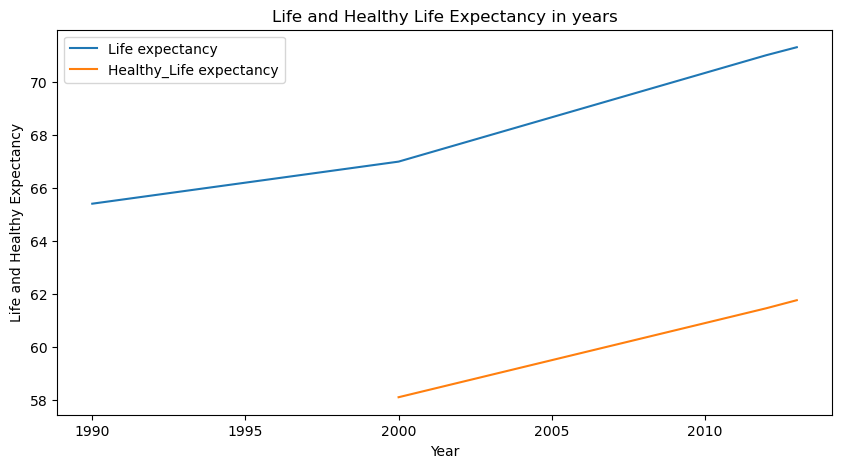

In [50]:
plt.figure(figsize=(10,5))
expectancy_year['Life expectancy'].plot(kind='line', legend=True)
expectancy_year['Healthy_Life expectancy'].plot(kind='line', legend=True)
plt.title('Life and Healthy Life Expectancy in years')
plt.xlabel('Year')
plt.ylabel('Life and Healthy Expectancy')
plt.show()

AS the year in progress, life expectancy and health expectancy are increasing.

How does the number of healthy years lose change overtime across different demographic groups?

In [51]:
# create a new column called healthy year lose dute disability,illness or any other factors

In [52]:
income = combine_df.groupby('IncomeGroup')[['Life expectancy','Healthy_Life expectancy']].mean()
income

,Life expectancy,Healthy_Life expectancy
IncomeGroup,,
High_income,76.254719,68.099032
Low_income,56.104352,50.729891
Lower_middle_income,65.712908,58.505533
Upper_middle_income,71.242616,62.972868


In [53]:
income['Healthy_Year_lose'] = income['Life expectancy'] - income['Healthy_Life expectancy']
income.head()

,Life expectancy,Healthy_Life expectancy,Healthy_Year_lose
IncomeGroup,,,
High_income,76.254719,68.099032,8.155688
Low_income,56.104352,50.729891,5.374461
Lower_middle_income,65.712908,58.505533,7.207375
Upper_middle_income,71.242616,62.972868,8.269748


In [54]:
#sns.kdeplot(data = income, x="IncomeGroup", hue="Year", multiple="stack")

How does healthy life expectancy correlate with life expectancy, health expenditure, BMI and population in different demographic groups such as age, geographical regions and income groups across the world?
What is the relationship between healthy life expectancy and BMI through time? Are there any patterns based on different BMI categories, and does it affect by gender?

In [55]:
combine_df.corr(numeric_only=True)

,Year,Value,Life expectancy,Healthy_Life expectancy,PPP,Population,BMI
Year,1.000000,0.095653,0.252166,0.190036,0.197730,0.034654,0.258667
Value,0.095653,1.000000,1.000000,1.000000,0.034608,0.005767,0.501697
Life expectancy,0.252166,1.000000,1.000000,NaN,0.040054,0.009187,0.603065
Healthy_Life expectancy,0.190036,1.000000,NaN,1.000000,0.037448,0.007556,0.540534
PPP,0.197730,0.034608,0.040054,0.037448,1.000000,-0.008492,0.034922
Population,0.034654,0.005767,0.009187,0.007556,-0.008492,1.000000,0.008825
BMI,0.258667,0.501697,0.603065,0.540534,0.034922,0.008825,1.000000


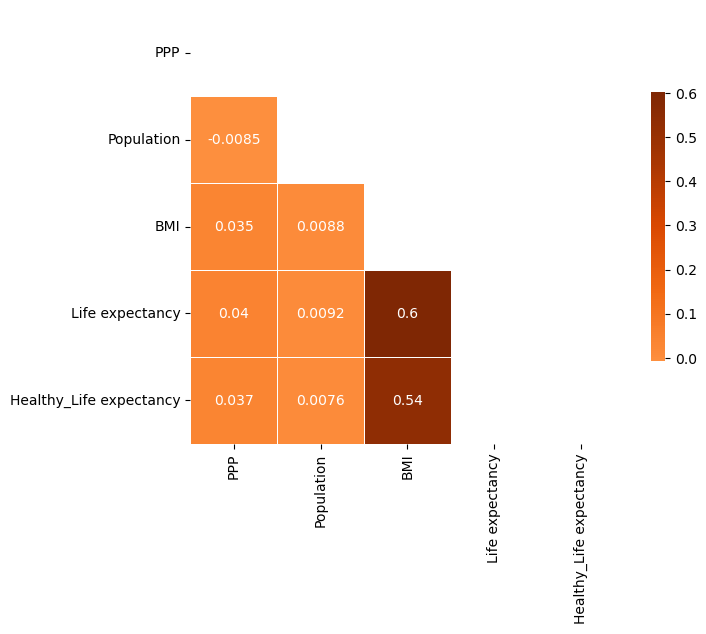

In [56]:
fig, ax = plt.subplots(figsize=(7, 7))

corr = combine_df[['PPP','Population','BMI','Life expectancy','Healthy_Life expectancy']].corr()
cmap = 'Oranges'
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask, center=0, annot =True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

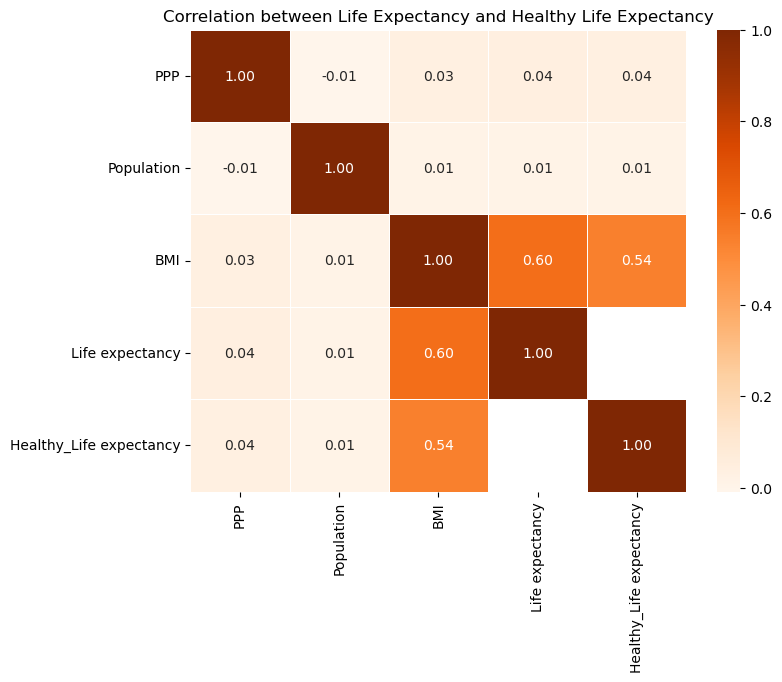

In [57]:
correlation = combine_df[['PPP','Population','BMI','Life expectancy','Healthy_Life expectancy']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Life Expectancy and Healthy Life Expectancy')
plt.show()